In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../datasets/data_v2.csv')

In [3]:
df.shape

(14972, 32)

In [4]:
df.head()

brand      price      Kondisi  TahunKendaraan      Kilometer   Warna  \
0  Toyota  615000000  Mobil Bekas            2024      0 - 5K km  Silver   
1  Toyota  175000000  Mobil Bekas            2014  110 - 115K km  Silver   
2  Toyota  288000000  Mobil Bekas            2012  170 - 175K km   Putih   
3  Suzuki  180000000  Mobil Bekas            2020    40 - 45K km  Orange   
4  Toyota  199000000  Mobil Bekas            2019    40 - 45K km   Putih   

   Transmisi  JumlahGir  Pintu  KapasitasKursi  ... Tinggi(mm)  JarakRoda(mm)  \
0     Manual        5.0      4              16  ...     2285.0         3110.0   
1  Automatic        4.0      5               8  ...     1750.0         2750.0   
2  Automatic        7.0      5               7  ...     1900.0         2950.0   
3  Automatic        4.0      5               7  ...     1710.0         2740.0   
4  Automatic        4.0      5               7  ...     1705.0         2685.0   

   ThreadDepan  ThreadBelakang  KonsumsiBahanBakar(L/100km)  BeratKosong(kg)  \
0       1665.0          1650.0                          NaN              NaN   
1       1510.0          1510.0                         10.5           1535.0   
2       1570.0          1575.0                          9.4           1890.0   
3       1515.0          1530.0                          NaN              NaN   
4       1450.0          1460.0                          NaN              NaN   

  RasioKompresi EmisiCO2 0-100km/jam(detik)  KecepatanTertinggi(km/jam)  
0           NaN      NaN                NaN                         NaN  
1           NaN      NaN                NaN                         NaN  
2           9.6    218.0                NaN                         NaN  
3          10.5      NaN                NaN                         NaN  
4           NaN      NaN                NaN                         NaN  

[5 rows x 32 columns]

In [5]:
df.isnull().sum()

brand                              0
price                              0
Kondisi                            0
TahunKendaraan                     0
Kilometer                          0
Warna                              0
Transmisi                          0
JumlahGir                       5076
Pintu                              0
KapasitasKursi                     0
Dirakit                          202
EngineCC                        1165
Baut(mm)                        4211
Struk(mm)                       4211
TenagaPuncak(hp)                1261
TenagaPutaranPuncak(Nm)         1261
InjeksiLangsung                 1281
Aspirasi                        1281
TipeBahanBakar                    20
RadiusPutar                     8320
Panjang(mm)                      129
Lebar(mm)                        129
Tinggi(mm)                       130
JarakRoda(mm)                    246
ThreadDepan                     4261
ThreadBelakang                  4346
KonsumsiBahanBakar(L/100km)    11653
B

C:\Users\50272\AppData\Local\Temp\ipykernel_37048\3270731649.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='vlag')


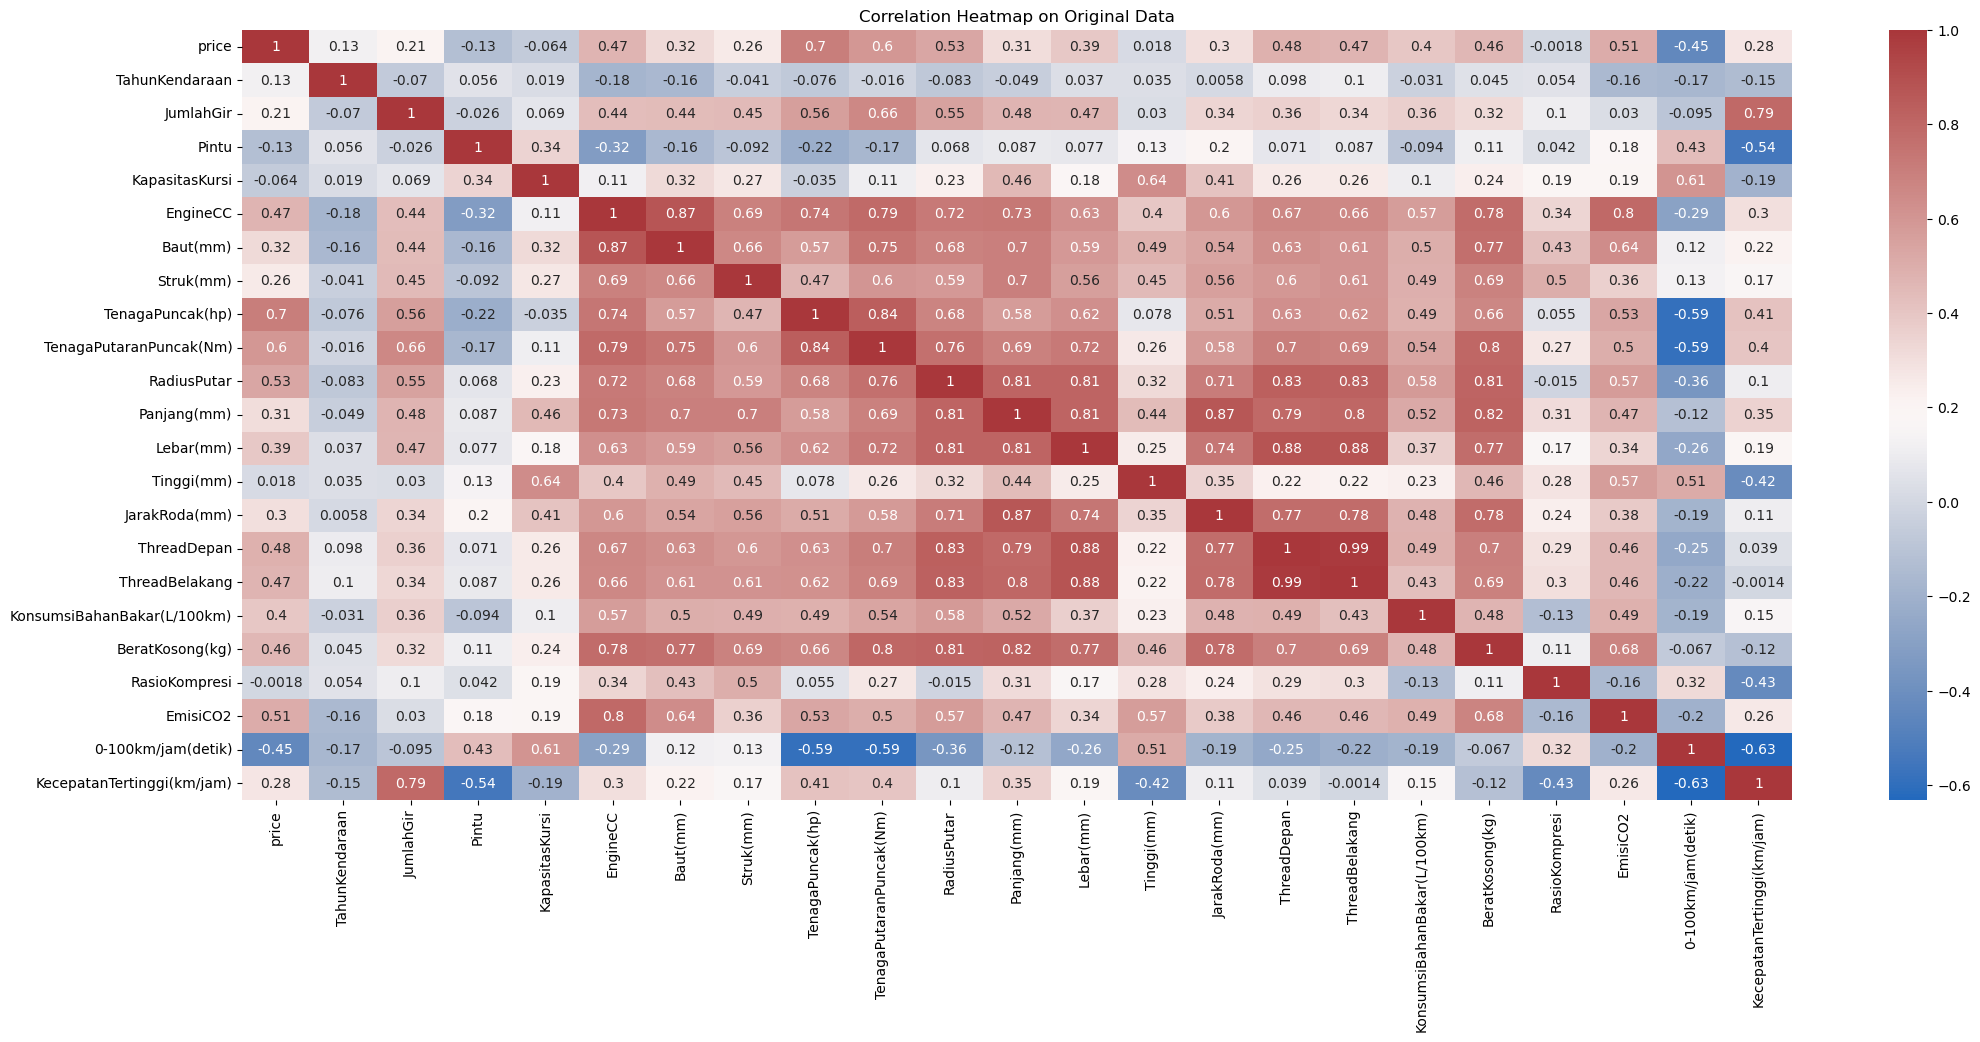

In [6]:
# Plot correlation heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(), annot=True, cmap='vlag')
plt.title("Correlation Heatmap on Original Data")
plt.show()

C:\Users\50272\AppData\Local\Temp\ipykernel_37048\4283695574.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'TahunKendaraan'}>,
        <Axes: title={'center': 'JumlahGir'}>,
        <Axes: title={'center': 'Pintu'}>,
        <Axes: title={'center': 'KapasitasKursi'}>],
       [<Axes: title={'center': 'EngineCC'}>,
        <Axes: title={'center': 'Baut(mm)'}>,
        <Axes: title={'center': 'Struk(mm)'}>,
        <Axes: title={'center': 'TenagaPuncak(hp)'}>,
        <Axes: title={'center': 'TenagaPutaranPuncak(Nm)'}>],
       [<Axes: title={'center': 'RadiusPutar'}>,
        <Axes: title={'center': 'Panjang(mm)'}>,
        <Axes: title={'center': 'Lebar(mm)'}>,
        <Axes: title={'center': 'Tinggi(mm)'}>,
        <Axes: title={'center': 'JarakRoda(mm)'}>],
       [<Axes: title={'center': 'ThreadDepan'}>,
        <Axes: title={'center': 'ThreadBelakang'}>,
        <Axes: title={'center': 'KonsumsiBahanBakar(L/100km)'}>,
        <Axes: title={'center': 'BeratKosong(kg)'}>,
        <Axes: title={'center': 'RasioKompr

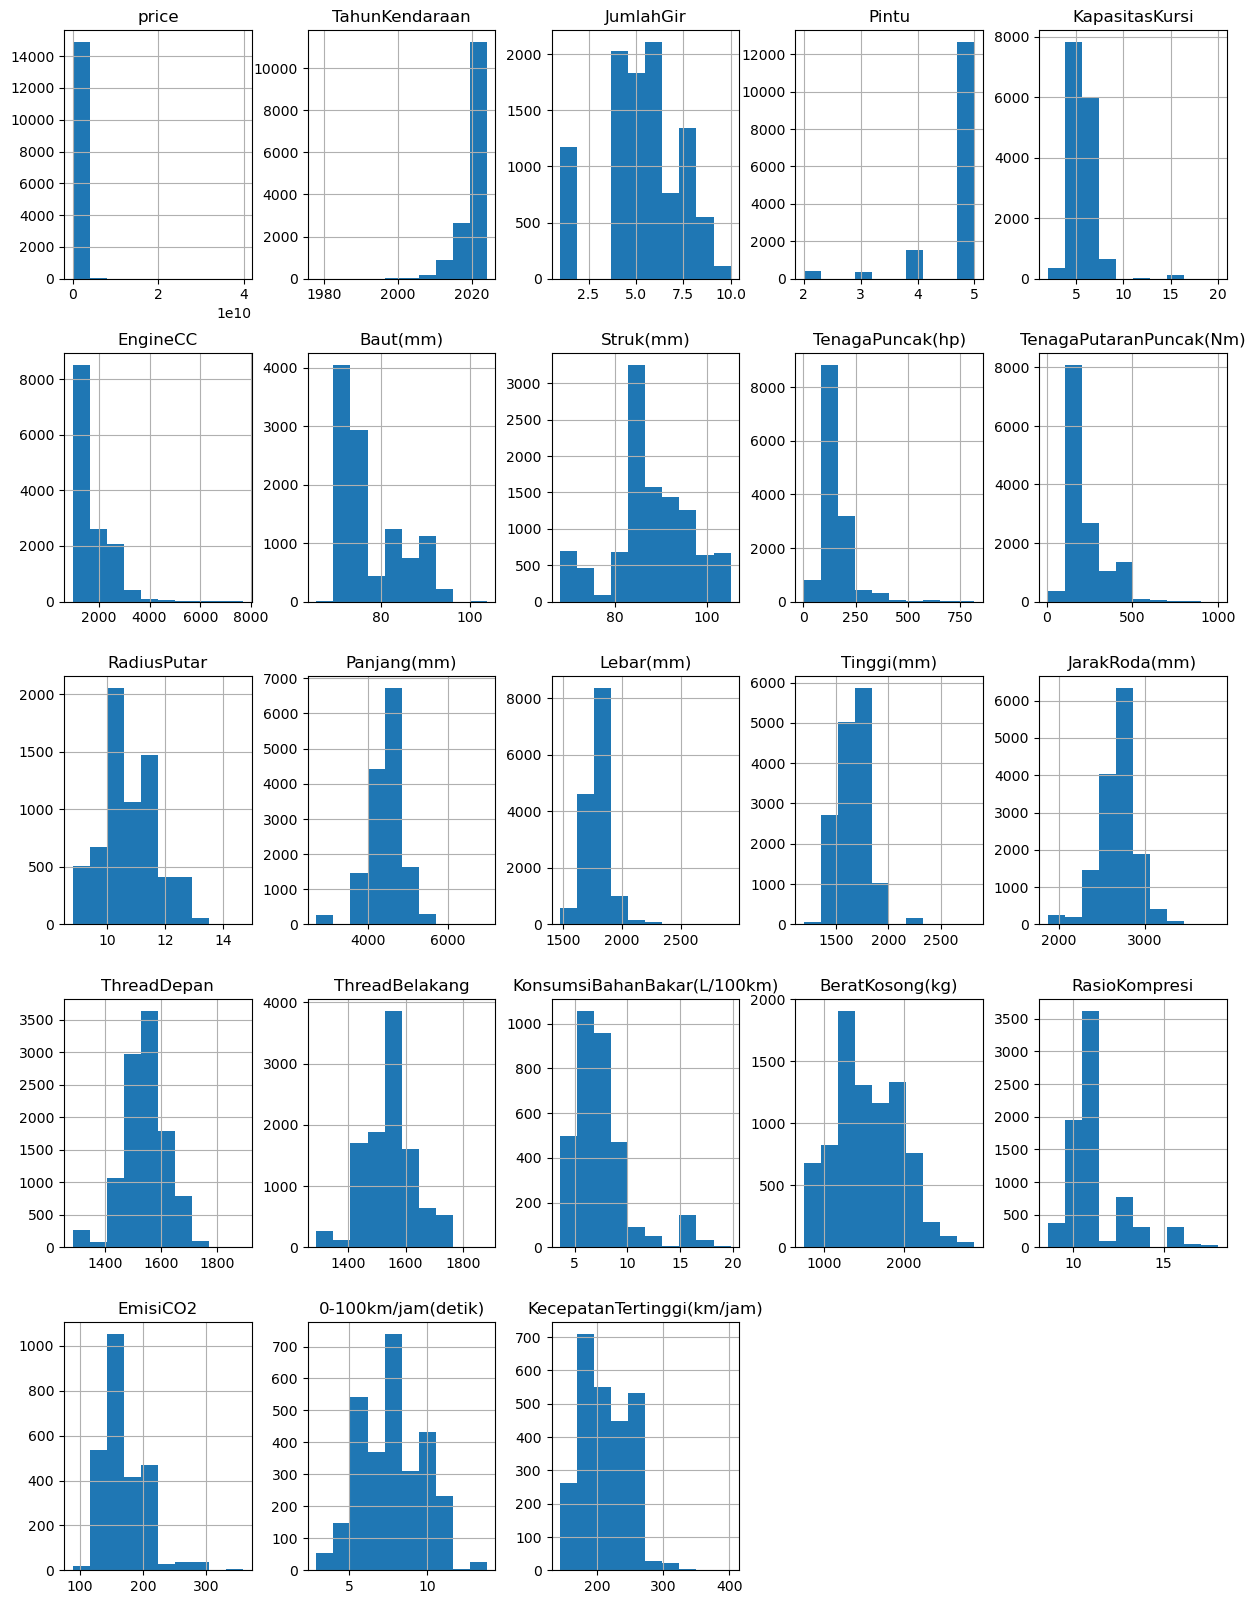

In [7]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

In [8]:
percent_missing = df.isnull().sum() * 100 / len(df)

print(percent_missing)

brand                           0.000000
price                           0.000000
Kondisi                         0.000000
TahunKendaraan                  0.000000
Kilometer                       0.000000
Warna                           0.000000
Transmisi                       0.000000
JumlahGir                      33.903286
Pintu                           0.000000
KapasitasKursi                  0.000000
Dirakit                         1.349185
EngineCC                        7.781192
Baut(mm)                       28.125835
Struk(mm)                      28.125835
TenagaPuncak(hp)                8.422388
TenagaPutaranPuncak(Nm)         8.422388
InjeksiLangsung                 8.555971
Aspirasi                        8.555971
TipeBahanBakar                  0.133583
RadiusPutar                    55.570398
Panjang(mm)                     0.861608
Lebar(mm)                       0.861608
Tinggi(mm)                      0.868287
JarakRoda(mm)                   1.643067
ThreadDepan     

In [9]:
dropped_features = []

for feat in df.columns:
    if percent_missing[feat] > 25:
        dropped_features.append(feat)

Drop kolom yang nilai missing valuenya diatas 25% dari total data

In [10]:
dropped_features

['JumlahGir',
 'Baut(mm)',
 'Struk(mm)',
 'RadiusPutar',
 'ThreadDepan',
 'ThreadBelakang',
 'KonsumsiBahanBakar(L/100km)',
 'BeratKosong(kg)',
 'RasioKompresi',
 'EmisiCO2',
 '0-100km/jam(detik)',
 'KecepatanTertinggi(km/jam)']

In [11]:
df.drop(columns=dropped_features, inplace=True)

In [12]:
df.dtypes

brand                       object
price                        int64
Kondisi                     object
TahunKendaraan               int64
Kilometer                   object
Warna                       object
Transmisi                   object
Pintu                        int64
KapasitasKursi               int64
Dirakit                     object
EngineCC                   float64
TenagaPuncak(hp)           float64
TenagaPutaranPuncak(Nm)    float64
InjeksiLangsung             object
Aspirasi                    object
TipeBahanBakar              object
Panjang(mm)                float64
Lebar(mm)                  float64
Tinggi(mm)                 float64
JarakRoda(mm)              float64
dtype: object

In [13]:
categorical_features = []
num_features = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_features.append(col)
    else:
        num_features.append(col)

In [14]:
def fill_nan(column, strat):
    imputer = SimpleImputer(strategy=strat)
    
    for col in column:
        df[col] = imputer.fit_transform(df[[col]]).squeeze()
        
    return df

In [15]:
print(df['Pintu'].value_counts(), "\n\n", df['KapasitasKursi'].value_counts())

5    12652
4     1533
2      428
3      359
Name: Pintu, dtype: int64 

 5     7028
7     5949
4      788
8      616
3      214
2      152
16     129
6       47
9       32
11       9
12       7
20       1
Name: KapasitasKursi, dtype: int64


In [16]:
# sns.pairplot(df)

In [17]:
categorical_df = df.select_dtypes(include="object")

In [18]:
categorical_df

brand      Kondisi      Kilometer   Warna  Transmisi  \
0          Toyota  Mobil Bekas      0 - 5K km  Silver     Manual   
1          Toyota  Mobil Bekas  110 - 115K km  Silver  Automatic   
2          Toyota  Mobil Bekas  170 - 175K km   Putih  Automatic   
3          Suzuki  Mobil Bekas    40 - 45K km  Orange  Automatic   
4          Toyota  Mobil Bekas    40 - 45K km   Putih  Automatic   
...           ...          ...            ...     ...        ...   
14967  Mitsubishi   Mobil Baru           - km   Hitam     Manual   
14968     Hyundai   Mobil Baru      0 - 5K km   Putih  Automatic   
14969      Toyota   Mobil Baru      0 - 5K km   Putih  Automatic   
14970    Daihatsu  Mobil Bekas  130 - 135K km  Silver     Manual   
14971      Wuling   Mobil Baru      0 - 5K km   Hitam  Automatic   

                         Dirakit                   InjeksiLangsung  \
0        Complete Built Up (CBU)                  Direct Injection   
1      Complete Knock Down (CKD)             Multi-Point Injection   
2        Complete Built Up (CBU)             Multi-Point Injection   
3      Complete Knock Down (CKD)             Multi-Point Injection   
4      Complete Knock Down (CKD)             Multi-Point Injection   
...                          ...                               ...   
14967  Complete Knock Down (CKD)  Indirect Injection (Pre-chamber)   
14968  Complete Knock Down (CKD)             Multi-Point Injection   
14969  Complete Knock Down (CKD)                  Direct Injection   
14970  Complete Knock Down (CKD)             Multi-Point Injection   
14971  Complete Knock Down (CKD)                               NaN   

           Aspirasi TipeBahanBakar  
0      Turbocharged          Solar  
1         Aspirated       Pertamax  
2         Aspirated       Pertamax  
3         Aspirated       Pertamax  
4         Aspirated       Pertamax  
...             ...            ...  
14967     Aspirated          Solar  
14968     Aspirated       Pertamax  
14969  Turbocharged          Solar  
14970     Aspirated       Pertamax  
14971           NaN       Electric  

[14972 rows x 9 columns]

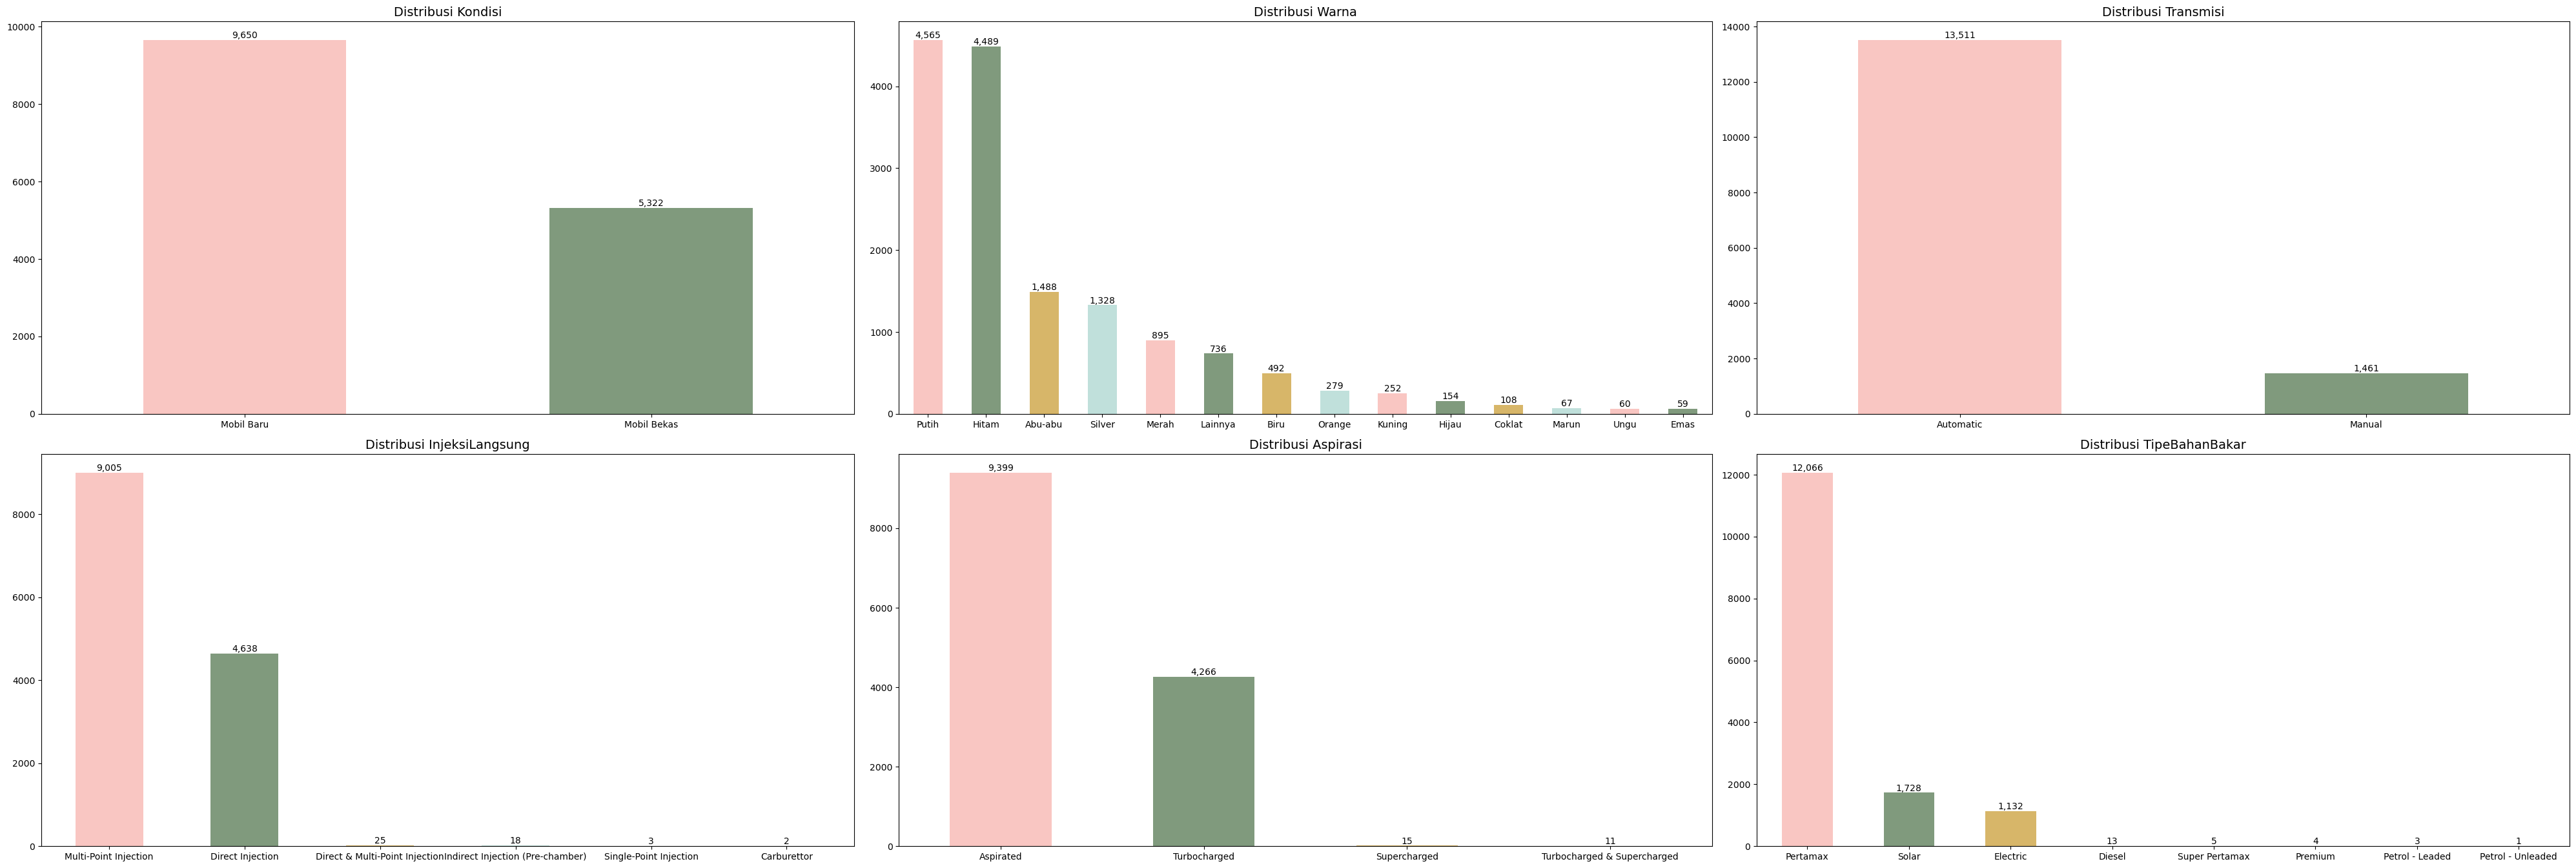

In [19]:
# Define the list of distinct colors
colors = ['#F9C6C2', '#809A7D', '#D7B669', '#C0E0DB']

plt.figure(figsize=(40, 20))

excludes = ["Kilometer", "Dirakit", "brand"]

for e in excludes:
    categorical_features.remove(e)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i + 1)
    counts = df[categorical_features[i]].value_counts()

    # Assign colors to categories based on the order of the colors list
    category_colors = [colors[j % len(colors)] for j in range(len(counts))]

    counts.plot(kind='bar', color=category_colors)
    plt.title('Distribusi ' + categorical_features[i], fontsize=14)
    plt.xticks(rotation=0)

    # Add bar labels
    for j, count in enumerate(counts):
        formatted_count = '{:,.0f}'.format(count)  # Format count with a comma separator
        plt.text(j, count, formatted_count, ha='center', va='bottom')

    plt.tight_layout()

plt.show()

### Notes
- Di kolom Aspirasi, Supercharged sama Turbocharged & Supercharged bisa diganti jadi Turbocharged aja
- Bahan bakar yang selain tiga terbesar bisa diganti jadi Solar
- Injeksi langsung sisanya diinclude ke direct injection

In [20]:
df['InjeksiLangsung'].value_counts()

Multi-Point Injection               9005
Direct Injection                    4638
Direct & Multi-Point Injection        25
Indirect Injection (Pre-chamber)      18
Single-Point Injection                 3
Carburettor                            2
Name: InjeksiLangsung, dtype: int64

In [21]:
df['TipeBahanBakar'].value_counts()

Pertamax             12066
Solar                 1728
Electric              1132
Diesel                  13
Super Pertamax           5
Premium                  4
Petrol - Leaded          3
Petrol - Unleaded        1
Name: TipeBahanBakar, dtype: int64

In [22]:
df['InjeksiLangsung'].replace(['Direct & Multi-Point Injection', 'Indirect Injection (Pre-chamber)', 'Single-Point Injection', 'Carburettor'], 'Direct Injection', inplace=True)

df['Aspirasi'].replace(['Supercharged', 'Turbocharged & Supercharged'], 'Turbocharged', inplace=True)

df['TipeBahanBakar'].replace(['Diesel', 'Super Pertamax', 'Petrol - Leaded', 'Premium', 'Petrol - Unleaded'], 'Solar', inplace=True)

In [23]:
df.shape

(14972, 20)

<Axes: >

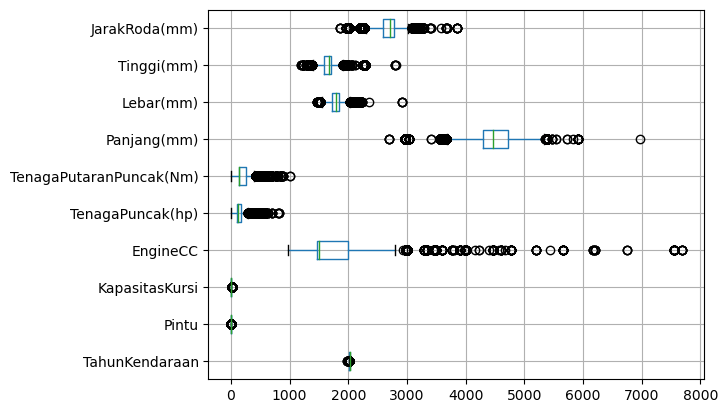

In [24]:
df.drop(columns='price').boxplot(vert=False)

### Notes
- Outlier banyak (including price), nanti bakal di cap pake winsorizer

In [25]:
missing_km = df.loc[df['Kilometer'] == "- km"].index

df.drop(missing_km, inplace=True)

Ada beberapa baris di kolok Kilometer yang isinya cuma " - km", jadi ini didrop juga

In [26]:
df['Kilometer'] = pd.to_numeric(df['Kilometer'].str.extract(r'(\d+) - (\d+)K km').max(axis=1), errors="coerce")

Format kolom Kilometer diganti jadi numerik

In [27]:
df.isnull().sum()

brand                         0
price                         0
Kondisi                       0
TahunKendaraan                0
Kilometer                  1350
Warna                         0
Transmisi                     0
Pintu                         0
KapasitasKursi                0
Dirakit                     202
EngineCC                    962
TenagaPuncak(hp)           1058
TenagaPutaranPuncak(Nm)    1058
InjeksiLangsung            1078
Aspirasi                   1078
TipeBahanBakar               20
Panjang(mm)                 129
Lebar(mm)                   129
Tinggi(mm)                  130
JarakRoda(mm)               206
dtype: int64

In [28]:
num_features.append("Kilometer")
categorical_features.append("Dirakit")

fill_nan(categorical_features, 'most_frequent')
fill_nan(num_features, 'median')

brand        price      Kondisi  TahunKendaraan  Kilometer   Warna  \
0         Toyota  615000000.0  Mobil Bekas          2024.0        5.0  Silver   
1         Toyota  175000000.0  Mobil Bekas          2014.0      115.0  Silver   
2         Toyota  288000000.0  Mobil Bekas          2012.0      175.0   Putih   
3         Suzuki  180000000.0  Mobil Bekas          2020.0       45.0  Orange   
4         Toyota  199000000.0  Mobil Bekas          2019.0       45.0   Putih   
...          ...          ...          ...             ...        ...     ...   
14966  Chevrolet  125000000.0  Mobil Bekas          2011.0        5.0   Putih   
14968    Hyundai  353000000.0   Mobil Baru          2024.0        5.0   Putih   
14969     Toyota  700000000.0   Mobil Baru          2024.0        5.0   Putih   
14970   Daihatsu  132000000.0  Mobil Bekas          2019.0      135.0  Silver   
14971     Wuling  398800000.0   Mobil Baru          2024.0        5.0   Hitam   

       Transmisi  Pintu  KapasitasKursi                    Dirakit  EngineCC  \
0         Manual    4.0            16.0    Complete Built Up (CBU)    2982.0   
1      Automatic    5.0             8.0  Complete Knock Down (CKD)    1998.0   
2      Automatic    5.0             7.0    Complete Built Up (CBU)    2362.0   
3      Automatic    5.0             7.0  Complete Knock Down (CKD)    1462.0   
4      Automatic    5.0             7.0  Complete Knock Down (CKD)    1496.0   
...          ...    ...             ...                        ...       ...   
14966  Automatic    5.0             7.0    Complete Built Up (CBU)    1998.0   
14968  Automatic    5.0             5.0  Complete Knock Down (CKD)    1497.0   
14969  Automatic    5.0             7.0  Complete Knock Down (CKD)    2755.0   
14970     Manual    5.0             7.0  Complete Knock Down (CKD)    1329.0   
14971  Automatic    5.0             5.0  Complete Knock Down (CKD)    1498.0   

       TenagaPuncak(hp)  TenagaPutaranPuncak(Nm)        InjeksiLangsung  \
0                 134.0                    300.0       Direct Injection   
1                 134.0                    182.0  Multi-Point Injection   
2                 168.0                    220.0  Multi-Point Injection   
3                 103.0                    138.0  Multi-Point Injection   
4                 103.0                    136.0  Multi-Point Injection   
...                 ...                      ...                    ...   
14966             161.0                    360.0       Direct Injection   
14968             113.0                    144.0  Multi-Point Injection   
14969             201.0                    499.0       Direct Injection   
14970              95.0                    121.0  Multi-Point Injection   
14971             118.0                    145.0  Multi-Point Injection   

           Aspirasi TipeBahanBakar  Panjang(mm)  Lebar(mm)  Tinggi(mm)  \
0      Turbocharged          Solar       5380.0     1880.0      2285.0   
1         Aspirated       Pertamax       4585.0     1760.0      1750.0   
2         Aspirated       Pertamax       4885.0     1840.0      1900.0   
3         Aspirated       Pertamax       4450.0     1775.0      1710.0   
4         Aspirated       Pertamax       4435.0     1695.0      1705.0   
...             ...            ...          ...        ...         ...   
14966  Turbocharged          Solar       4673.0     1849.0      1756.0   
14968     Aspirated       Pertamax       4315.0     1790.0      1630.0   
14969  Turbocharged          Solar       4795.0     1855.0      1835.0   
14970     Aspirated       Pertamax       4190.0     1660.0      1695.0   
14971     Aspirated       Electric       4295.0     1850.0      1652.0   

       JarakRoda(mm)  
0             3110.0  
1             2750.0  
2             2950.0  
3             2740.0  
4             2685.0  
...              ...  
14966         2707.0  
14968         2610.0  
14969         2745.0  
14970         2655.0  
14971         2700.0  

[12718 row

In [29]:
df.isnull().sum()

brand                      0
price                      0
Kondisi                    0
TahunKendaraan             0
Kilometer                  0
Warna                      0
Transmisi                  0
Pintu                      0
KapasitasKursi             0
Dirakit                    0
EngineCC                   0
TenagaPuncak(hp)           0
TenagaPutaranPuncak(Nm)    0
InjeksiLangsung            0
Aspirasi                   0
TipeBahanBakar             0
Panjang(mm)                0
Lebar(mm)                  0
Tinggi(mm)                 0
JarakRoda(mm)              0
dtype: int64

C:\Users\50272\AppData\Local\Temp\ipykernel_37048\2976896873.py:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dft.corr(), annot=True, cmap='vlag')


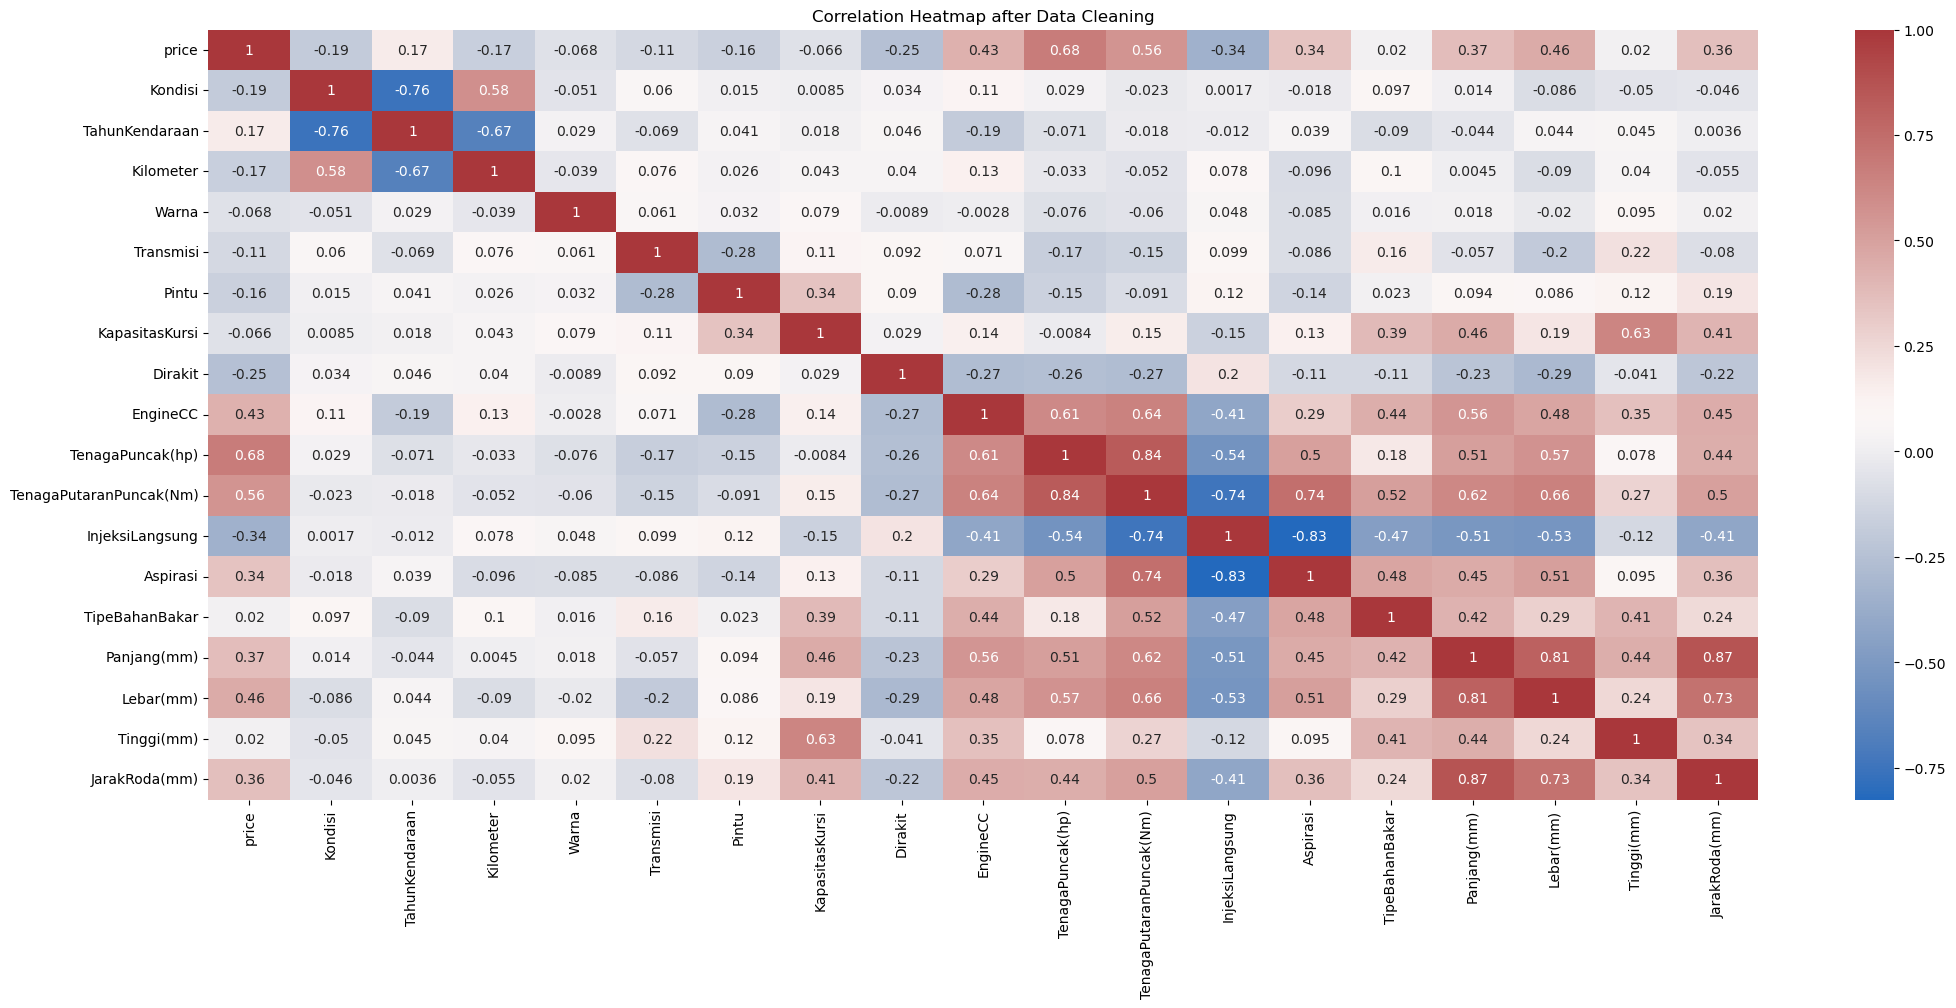

In [30]:
# Plot correlation heatmap

dft = df.copy()

encoder = LabelEncoder()

for col in dft.columns:
    if col in categorical_features:
        dft[col] = encoder.fit_transform(dft[col])

plt.figure(figsize=(25, 10))
sns.heatmap(dft.corr(), annot=True, cmap='vlag')
plt.title("Correlation Heatmap after Data Cleaning")
plt.show()

### Notes
- Tinggi, Kapasitas Kursi, Tipe BBM, Warna, Transmisi, sama Tinggi ga pengaruh tinggi ke harga, bisa didrop aja

In [31]:
redundant_features = ['Tinggi(mm)', 'KapasitasKursi', 'TipeBahanBakar', 'Warna', 'Transmisi']

df.drop(columns=redundant_features, inplace=True)

num_features.remove("KapasitasKursi")
num_features.remove("Tinggi(mm)")

In [32]:
categorical_features

['Kondisi',
 'Warna',
 'Transmisi',
 'InjeksiLangsung',
 'Aspirasi',
 'TipeBahanBakar',
 'Dirakit']

In [33]:
num_features

['price',
 'TahunKendaraan',
 'Pintu',
 'EngineCC',
 'TenagaPuncak(hp)',
 'TenagaPutaranPuncak(Nm)',
 'Panjang(mm)',
 'Lebar(mm)',
 'JarakRoda(mm)',
 'Kilometer']

In [34]:
df['Kilometer'].nunique()

45

In [35]:
df.isnull().sum()

brand                      0
price                      0
Kondisi                    0
TahunKendaraan             0
Kilometer                  0
Pintu                      0
Dirakit                    0
EngineCC                   0
TenagaPuncak(hp)           0
TenagaPutaranPuncak(Nm)    0
InjeksiLangsung            0
Aspirasi                   0
Panjang(mm)                0
Lebar(mm)                  0
JarakRoda(mm)              0
dtype: int64

In [36]:
df

brand        price      Kondisi  TahunKendaraan  Kilometer  Pintu  \
0         Toyota  615000000.0  Mobil Bekas          2024.0        5.0    4.0   
1         Toyota  175000000.0  Mobil Bekas          2014.0      115.0    5.0   
2         Toyota  288000000.0  Mobil Bekas          2012.0      175.0    5.0   
3         Suzuki  180000000.0  Mobil Bekas          2020.0       45.0    5.0   
4         Toyota  199000000.0  Mobil Bekas          2019.0       45.0    5.0   
...          ...          ...          ...             ...        ...    ...   
14966  Chevrolet  125000000.0  Mobil Bekas          2011.0        5.0    5.0   
14968    Hyundai  353000000.0   Mobil Baru          2024.0        5.0    5.0   
14969     Toyota  700000000.0   Mobil Baru          2024.0        5.0    5.0   
14970   Daihatsu  132000000.0  Mobil Bekas          2019.0      135.0    5.0   
14971     Wuling  398800000.0   Mobil Baru          2024.0        5.0    5.0   

                         Dirakit  EngineCC  TenagaPuncak(hp)  \
0        Complete Built Up (CBU)    2982.0             134.0   
1      Complete Knock Down (CKD)    1998.0             134.0   
2        Complete Built Up (CBU)    2362.0             168.0   
3      Complete Knock Down (CKD)    1462.0             103.0   
4      Complete Knock Down (CKD)    1496.0             103.0   
...                          ...       ...               ...   
14966    Complete Built Up (CBU)    1998.0             161.0   
14968  Complete Knock Down (CKD)    1497.0             113.0   
14969  Complete Knock Down (CKD)    2755.0             201.0   
14970  Complete Knock Down (CKD)    1329.0              95.0   
14971  Complete Knock Down (CKD)    1498.0             118.0   

       TenagaPutaranPuncak(Nm)        InjeksiLangsung      Aspirasi  \
0                        300.0       Direct Injection  Turbocharged   
1                        182.0  Multi-Point Injection     Aspirated   
2                        220.0  Multi-Point Injection     Aspirated   
3                        138.0  Multi-Point Injection     Aspirated   
4                        136.0  Multi-Point Injection     Aspirated   
...                        ...                    ...           ...   
14966                    360.0       Direct Injection  Turbocharged   
14968                    144.0  Multi-Point Injection     Aspirated   
14969                    499.0       Direct Injection  Turbocharged   
14970                    121.0  Multi-Point Injection     Aspirated   
14971                    145.0  Multi-Point Injection     Aspirated   

       Panjang(mm)  Lebar(mm)  JarakRoda(mm)  
0           5380.0     1880.0         3110.0  
1           4585.0     1760.0         2750.0  
2           4885.0     1840.0         2950.0  
3           4450.0     1775.0         2740.0  
4           4435.0     1695.0         2685.0  
...            ...        ...            ...  
14966       4673.0     1849.0         2707.0  
14968       4315.0     1790.0         2610.0  
14969       4795.0     1855.0         2745.0  
14970       4190.0     1660.0         2655.0  
14971       4295.0     1850.0         2700.0  

[12718 rows x 15 columns]

### EDA

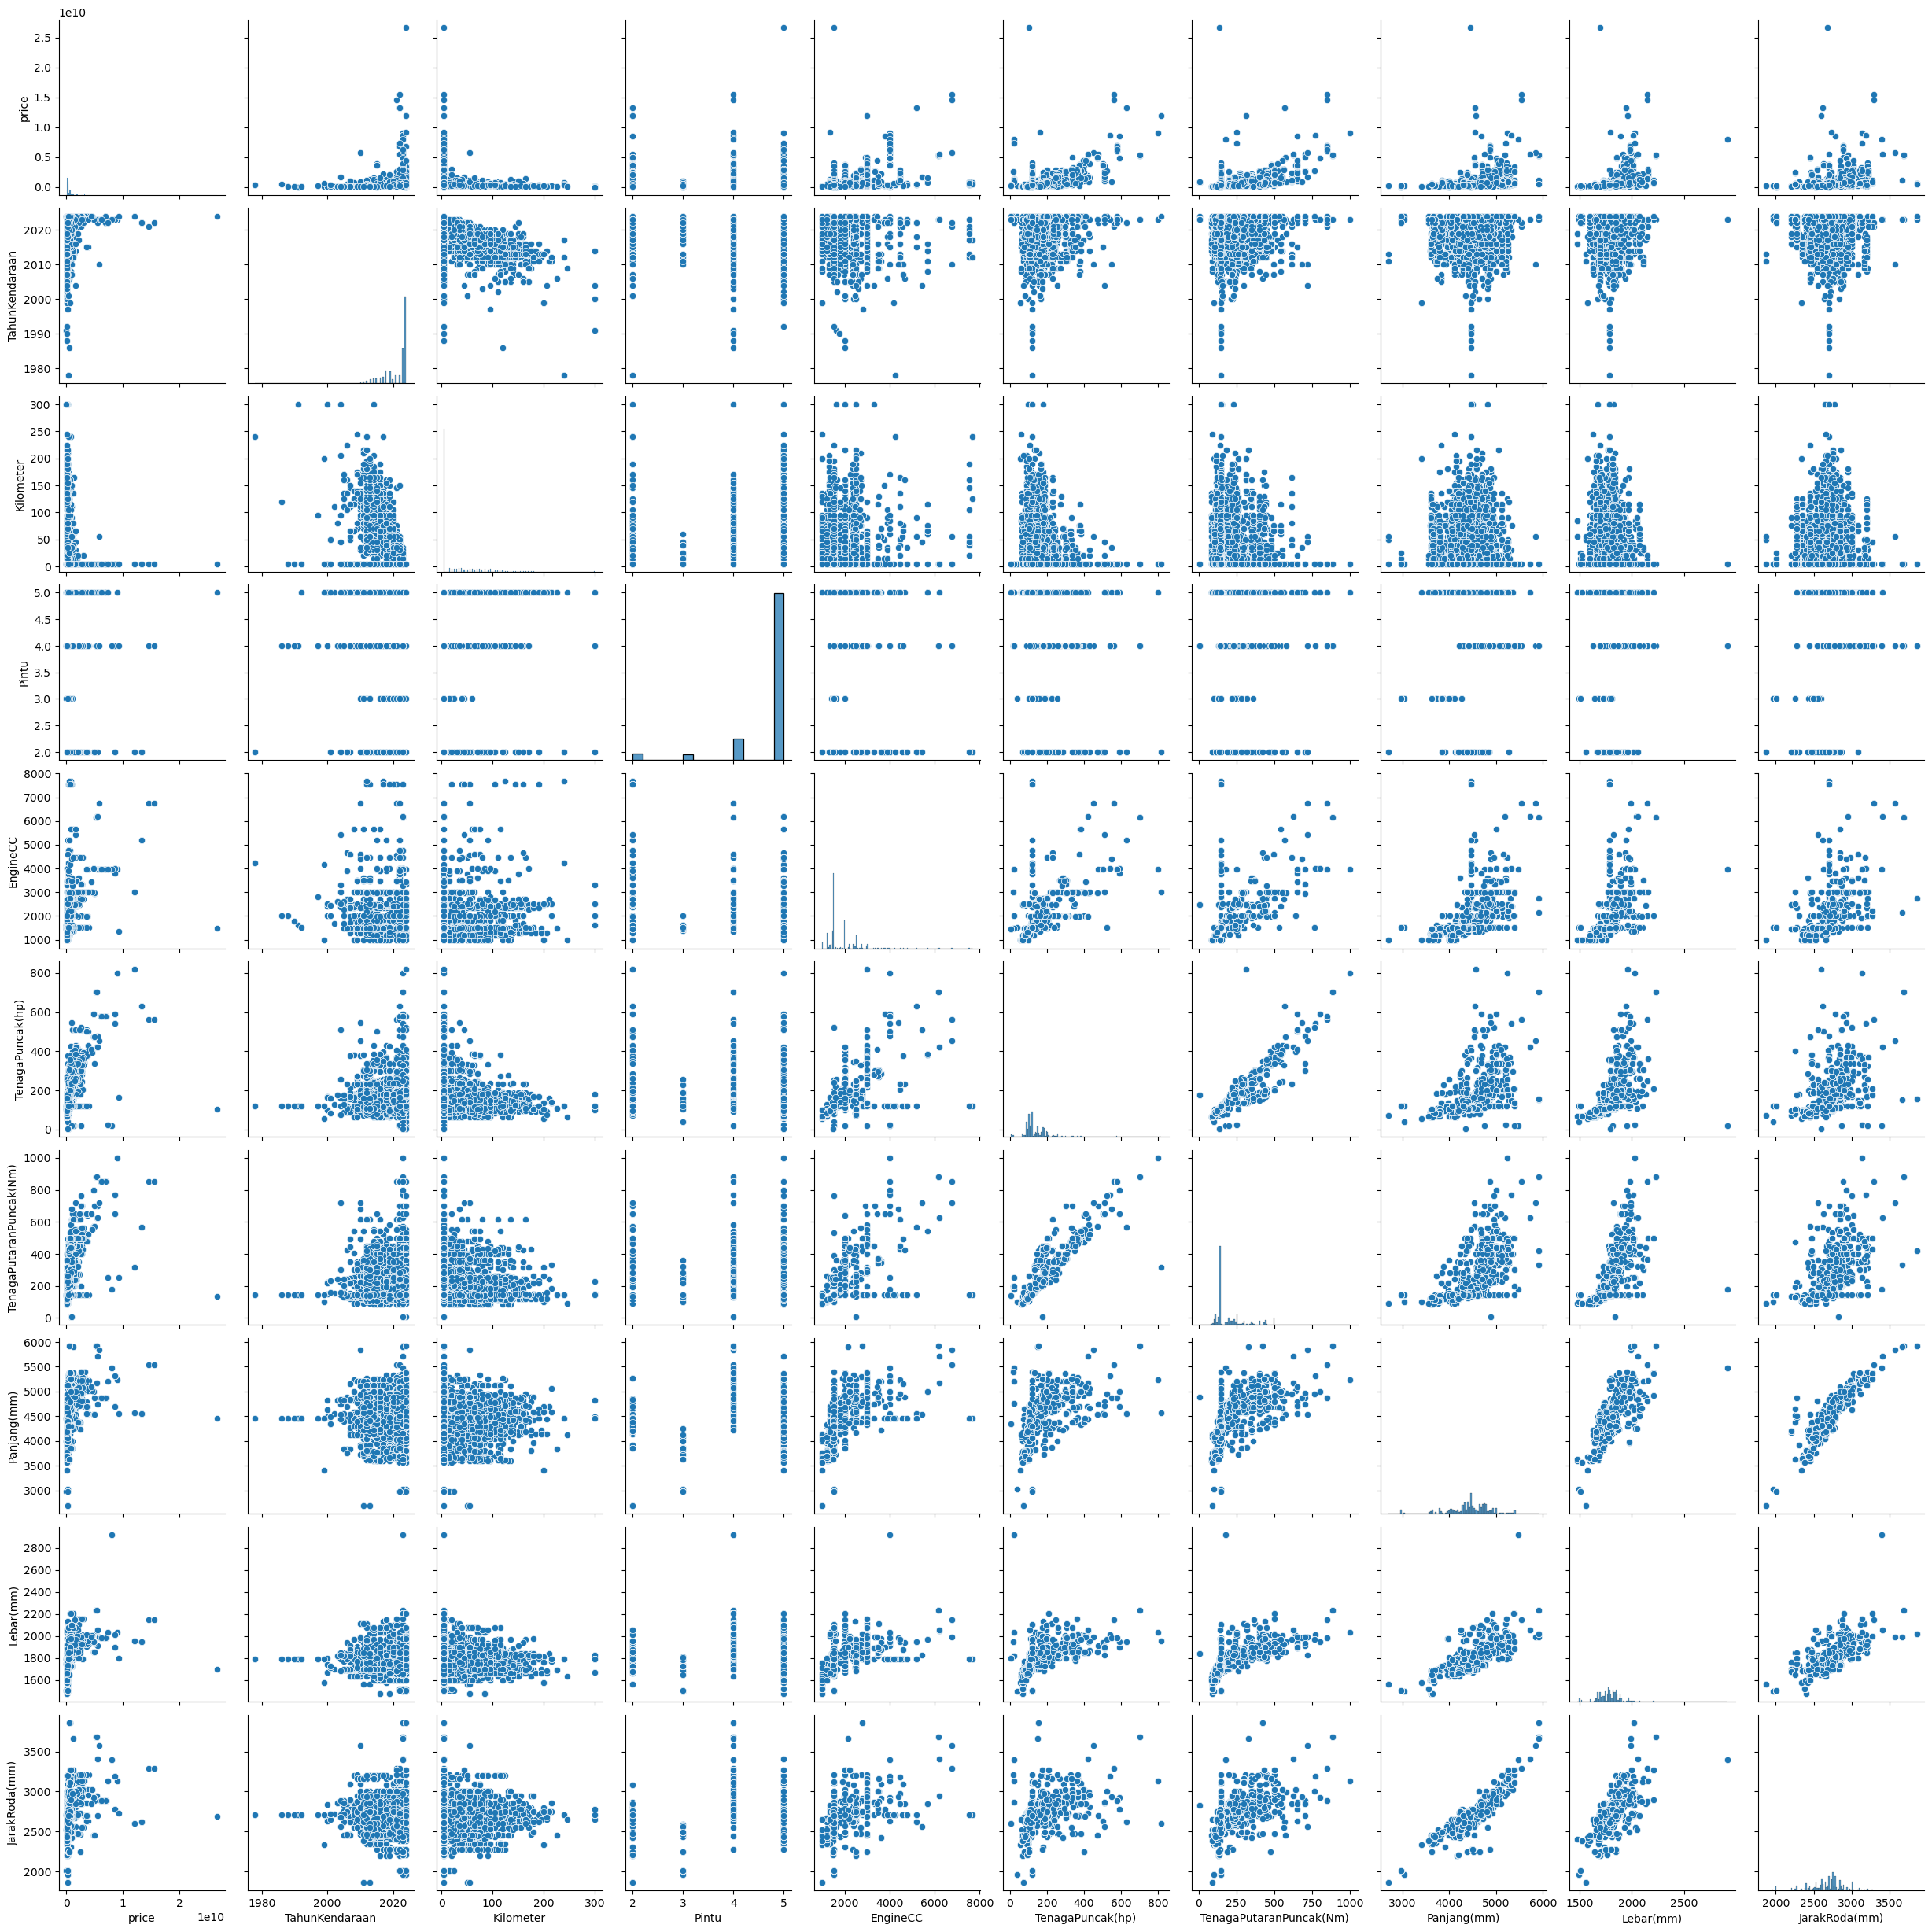

In [37]:
sns.pairplot(df.select_dtypes(exclude="object"))

In [38]:
num_features

['price',
 'TahunKendaraan',
 'Pintu',
 'EngineCC',
 'TenagaPuncak(hp)',
 'TenagaPutaranPuncak(Nm)',
 'Panjang(mm)',
 'Lebar(mm)',
 'JarakRoda(mm)',
 'Kilometer']

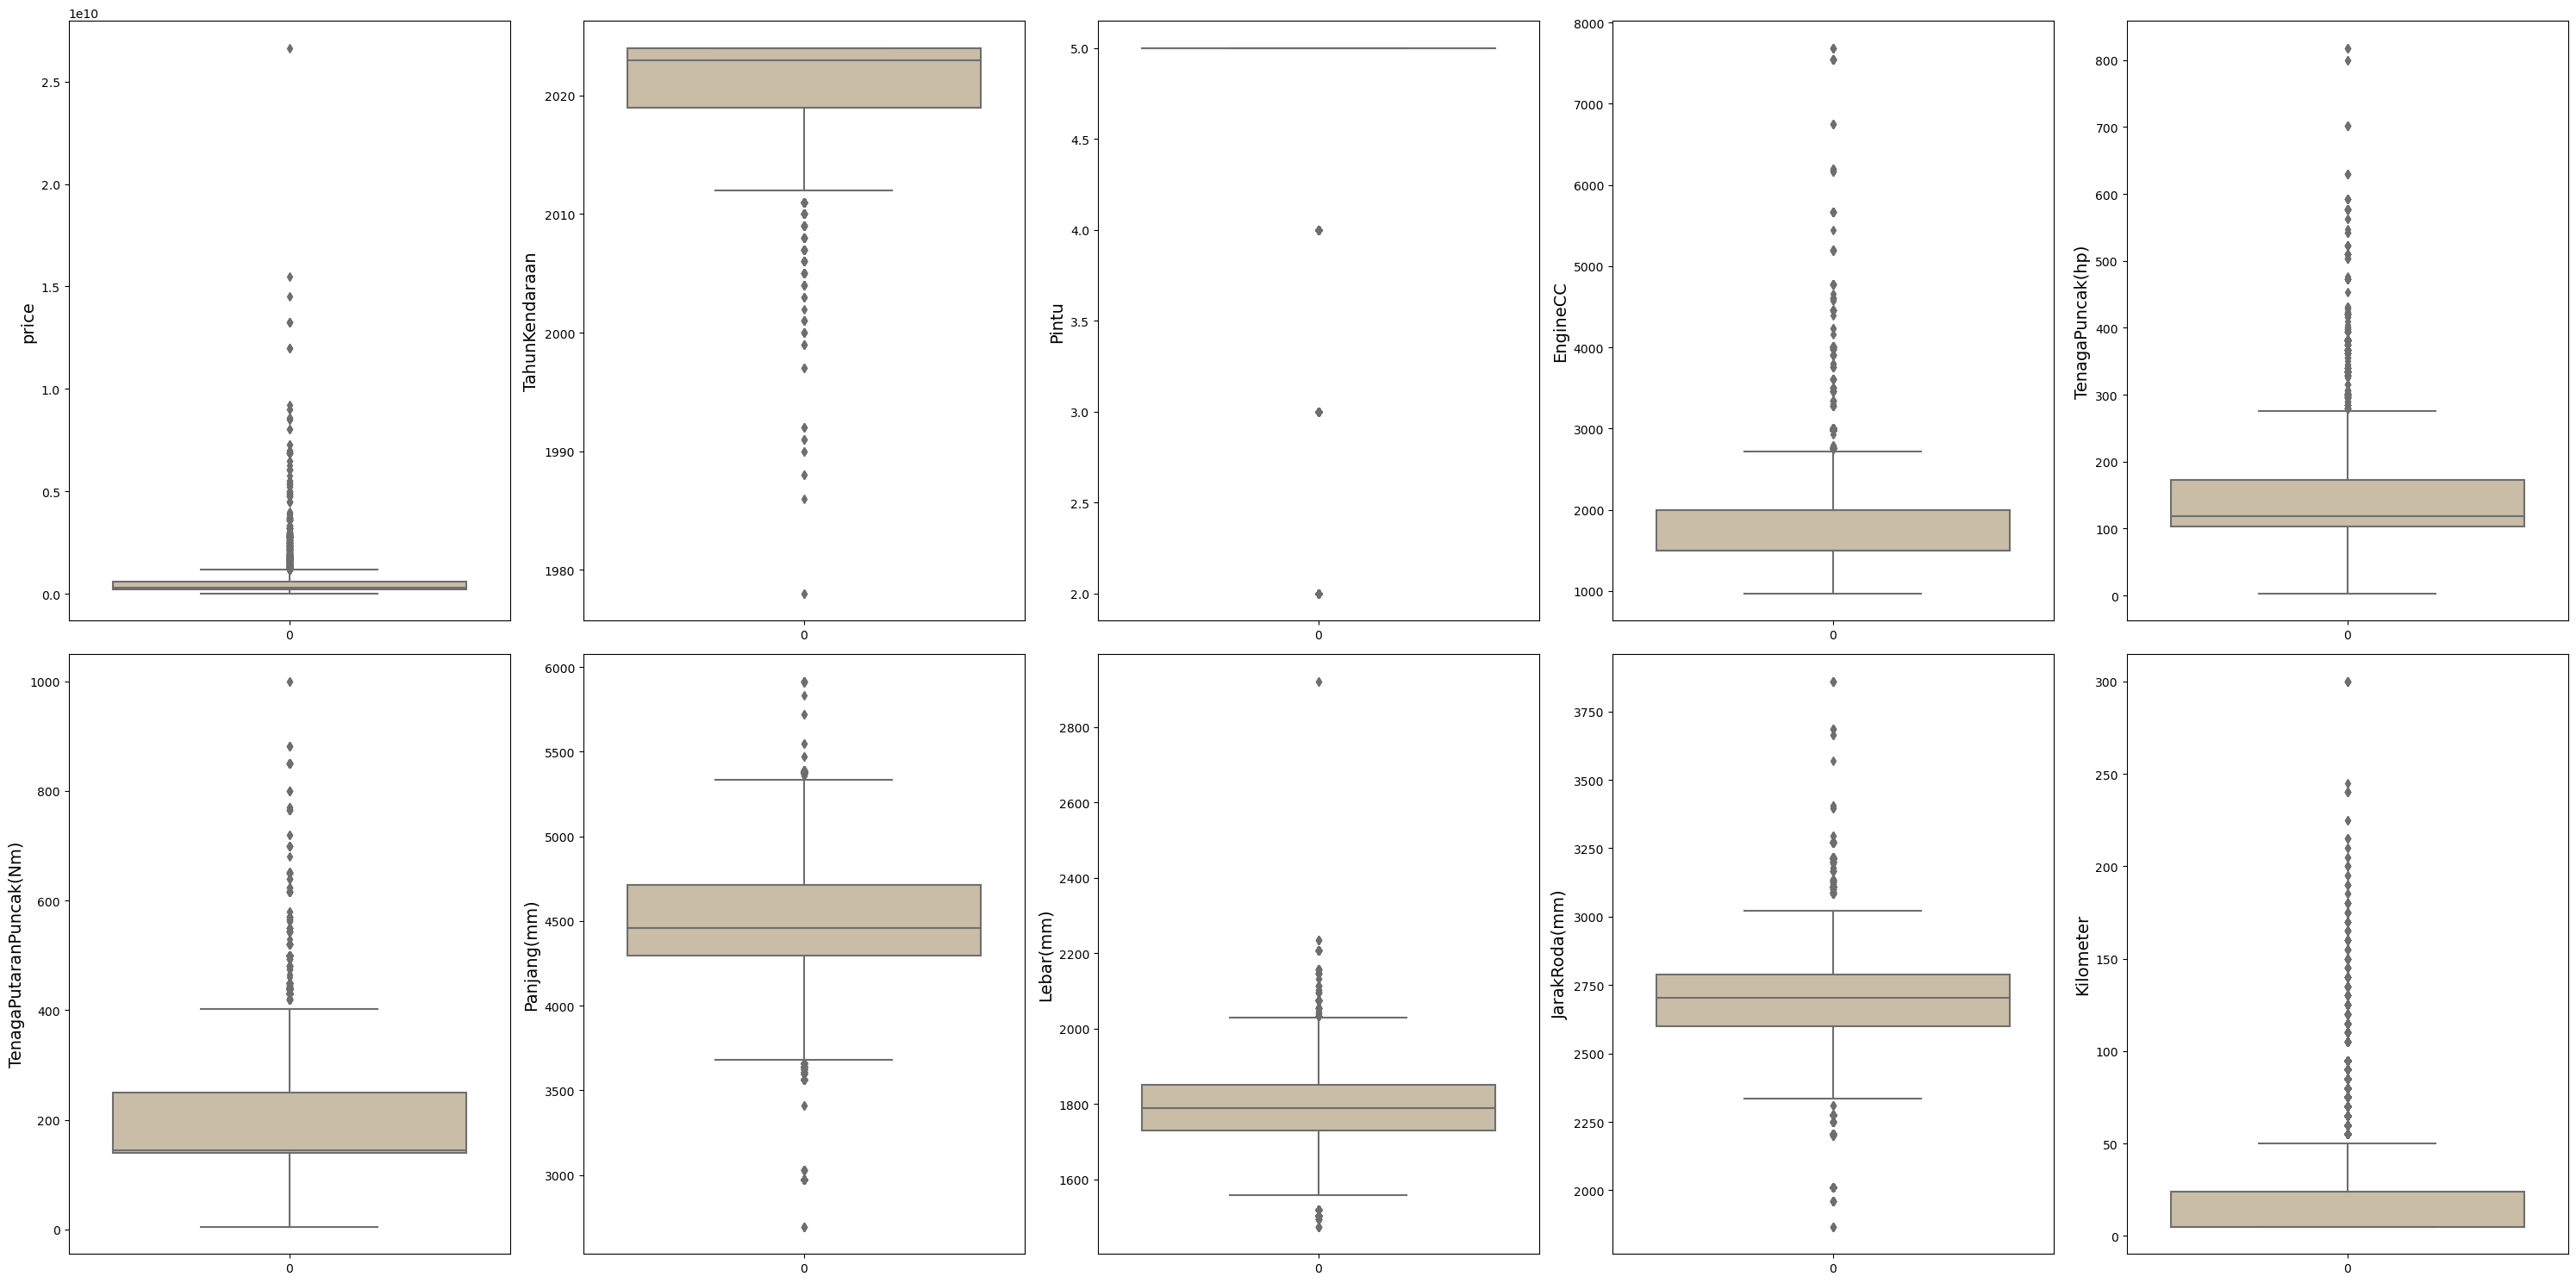

In [39]:
plt.figure(figsize=(30,15))

for i in range(0, len(num_features)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(df[num_features[i]], color='#CEBFA2')
    plt.ylabel(num_features[i], fontsize=14)
    plt.tight_layout()
plt.show()

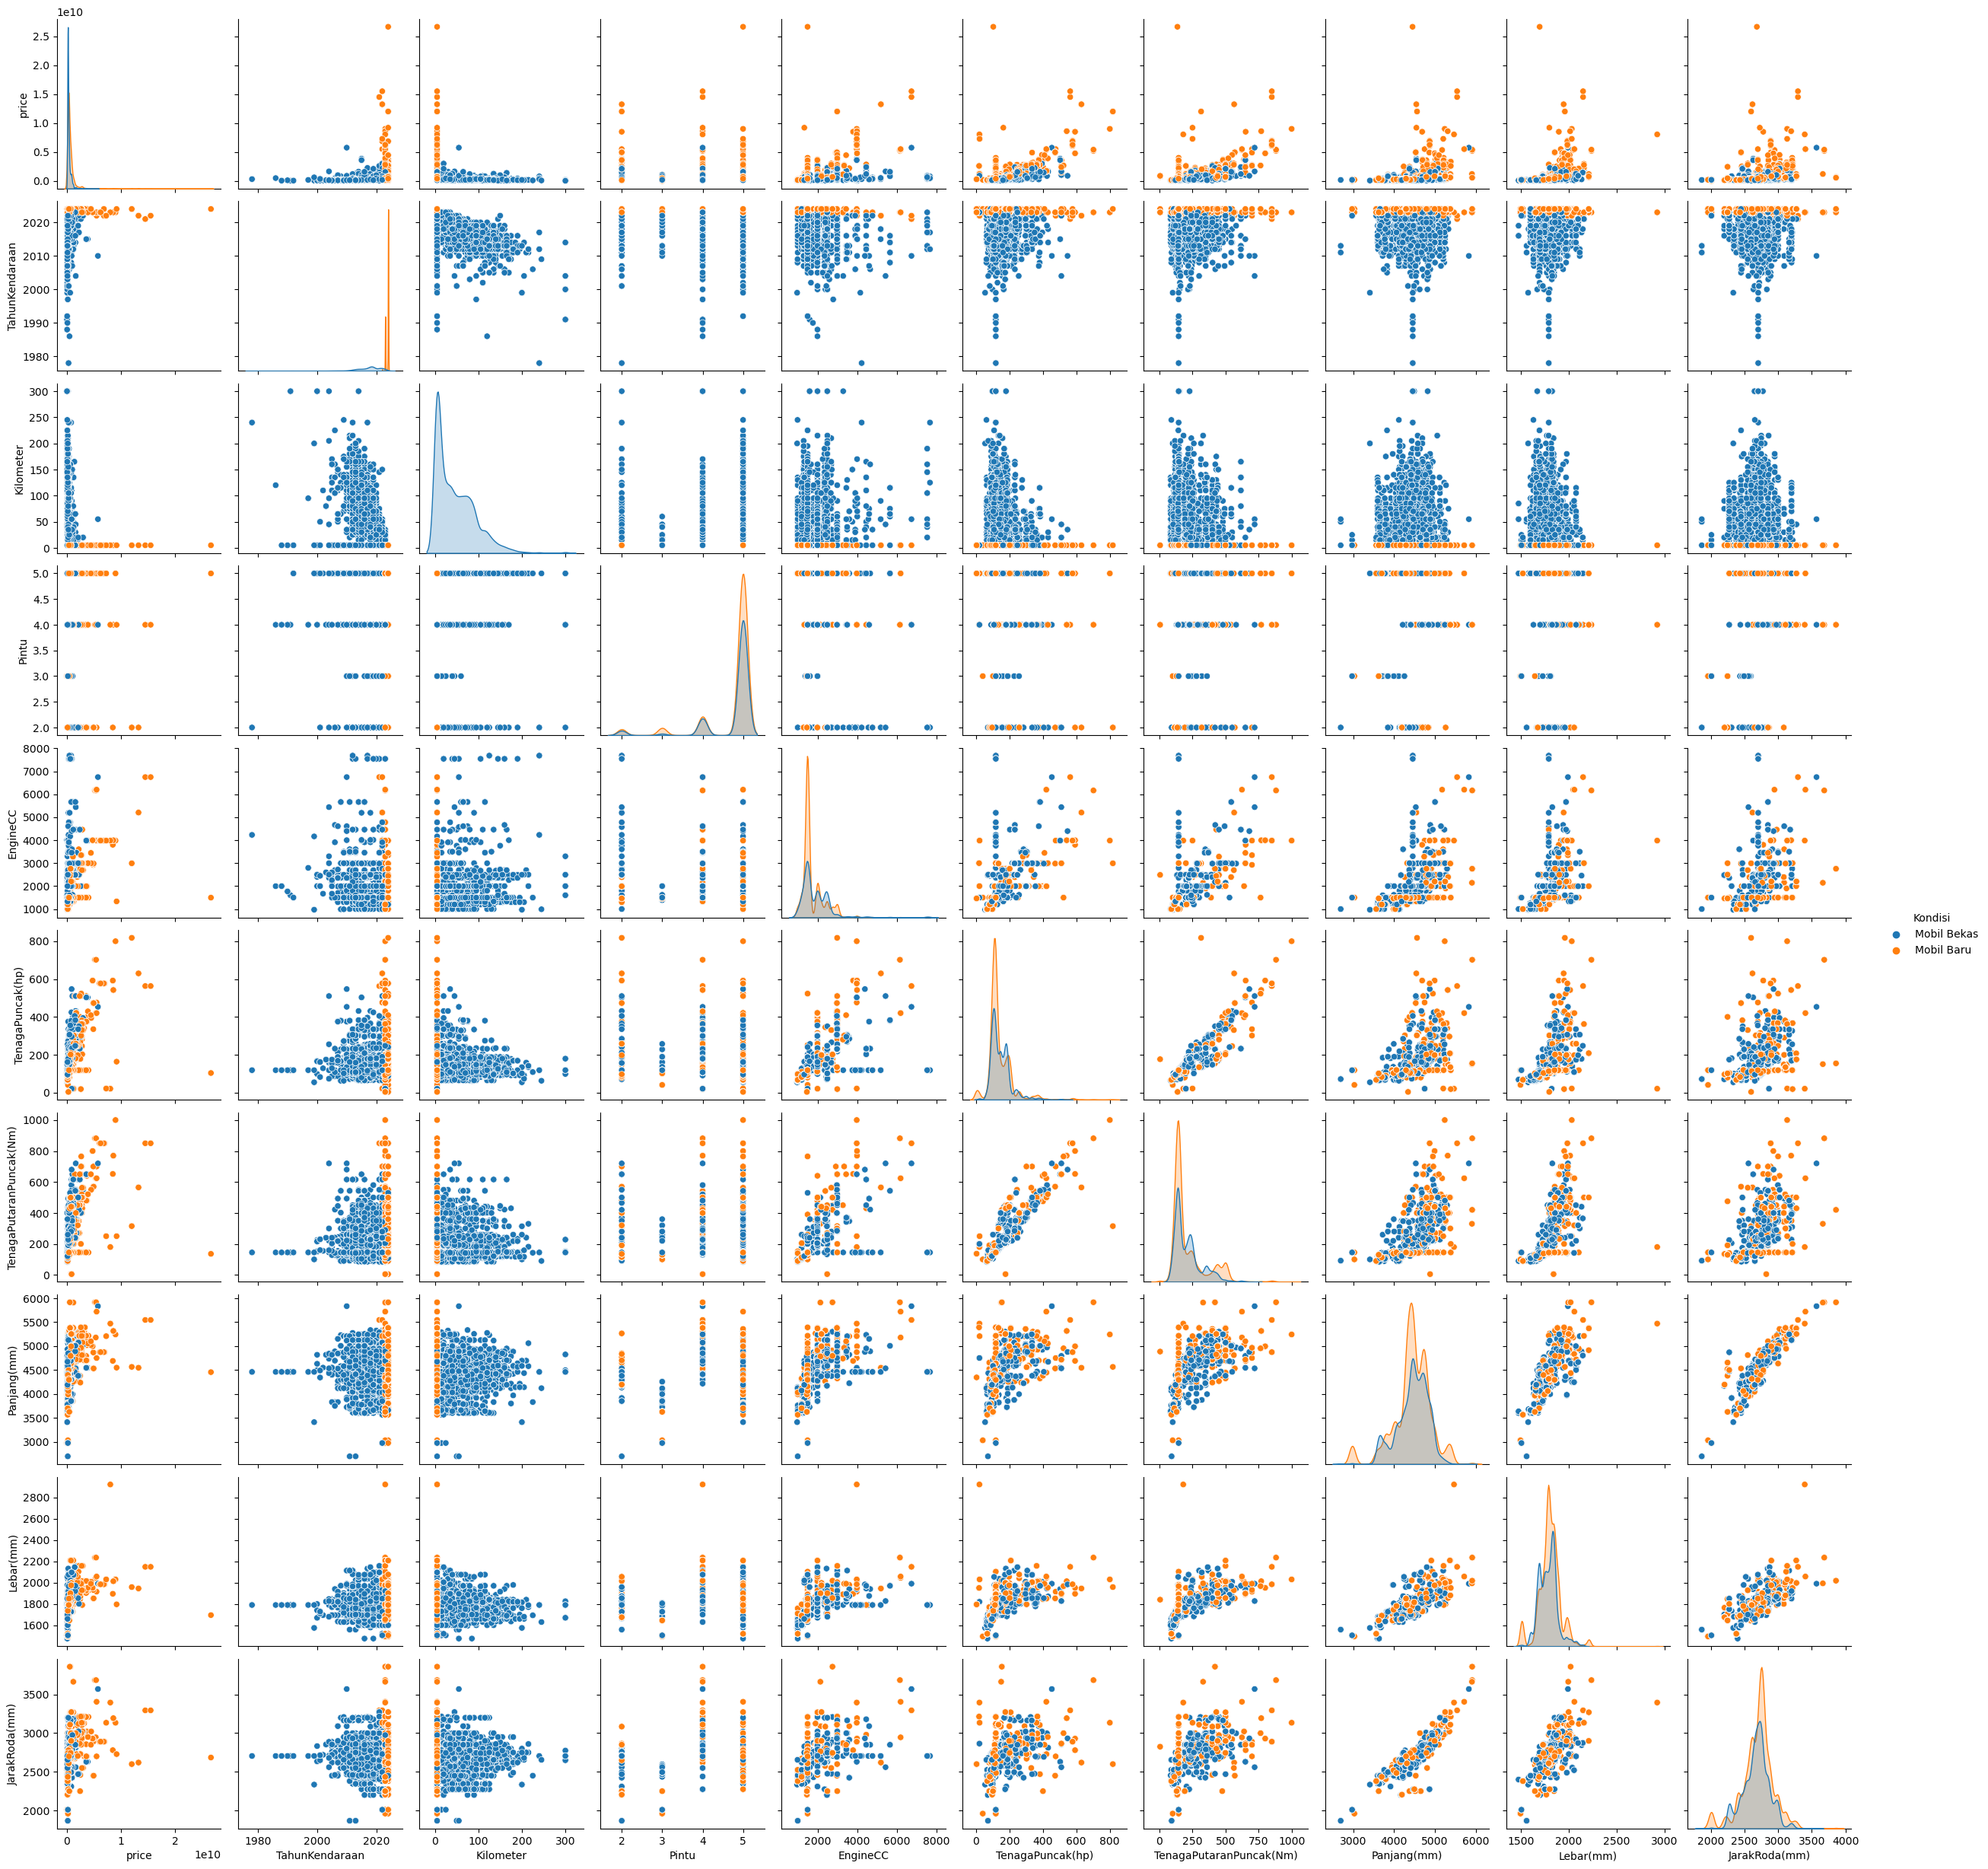

In [40]:
num_df = df.select_dtypes(exclude="object")

num_df['Kondisi'] = df['Kondisi']

sns.pairplot(num_df, hue="Kondisi")

C:\Users\50272\AppData\Local\Temp\ipykernel_37048\4283695574.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'TahunKendaraan'}>,
        <Axes: title={'center': 'Kilometer'}>],
       [<Axes: title={'center': 'Pintu'}>,
        <Axes: title={'center': 'EngineCC'}>,
        <Axes: title={'center': 'TenagaPuncak(hp)'}>],
       [<Axes: title={'center': 'TenagaPutaranPuncak(Nm)'}>,
        <Axes: title={'center': 'Panjang(mm)'}>,
        <Axes: title={'center': 'Lebar(mm)'}>],
       [<Axes: title={'center': 'JarakRoda(mm)'}>, <Axes: >, <Axes: >]],
      dtype=object)

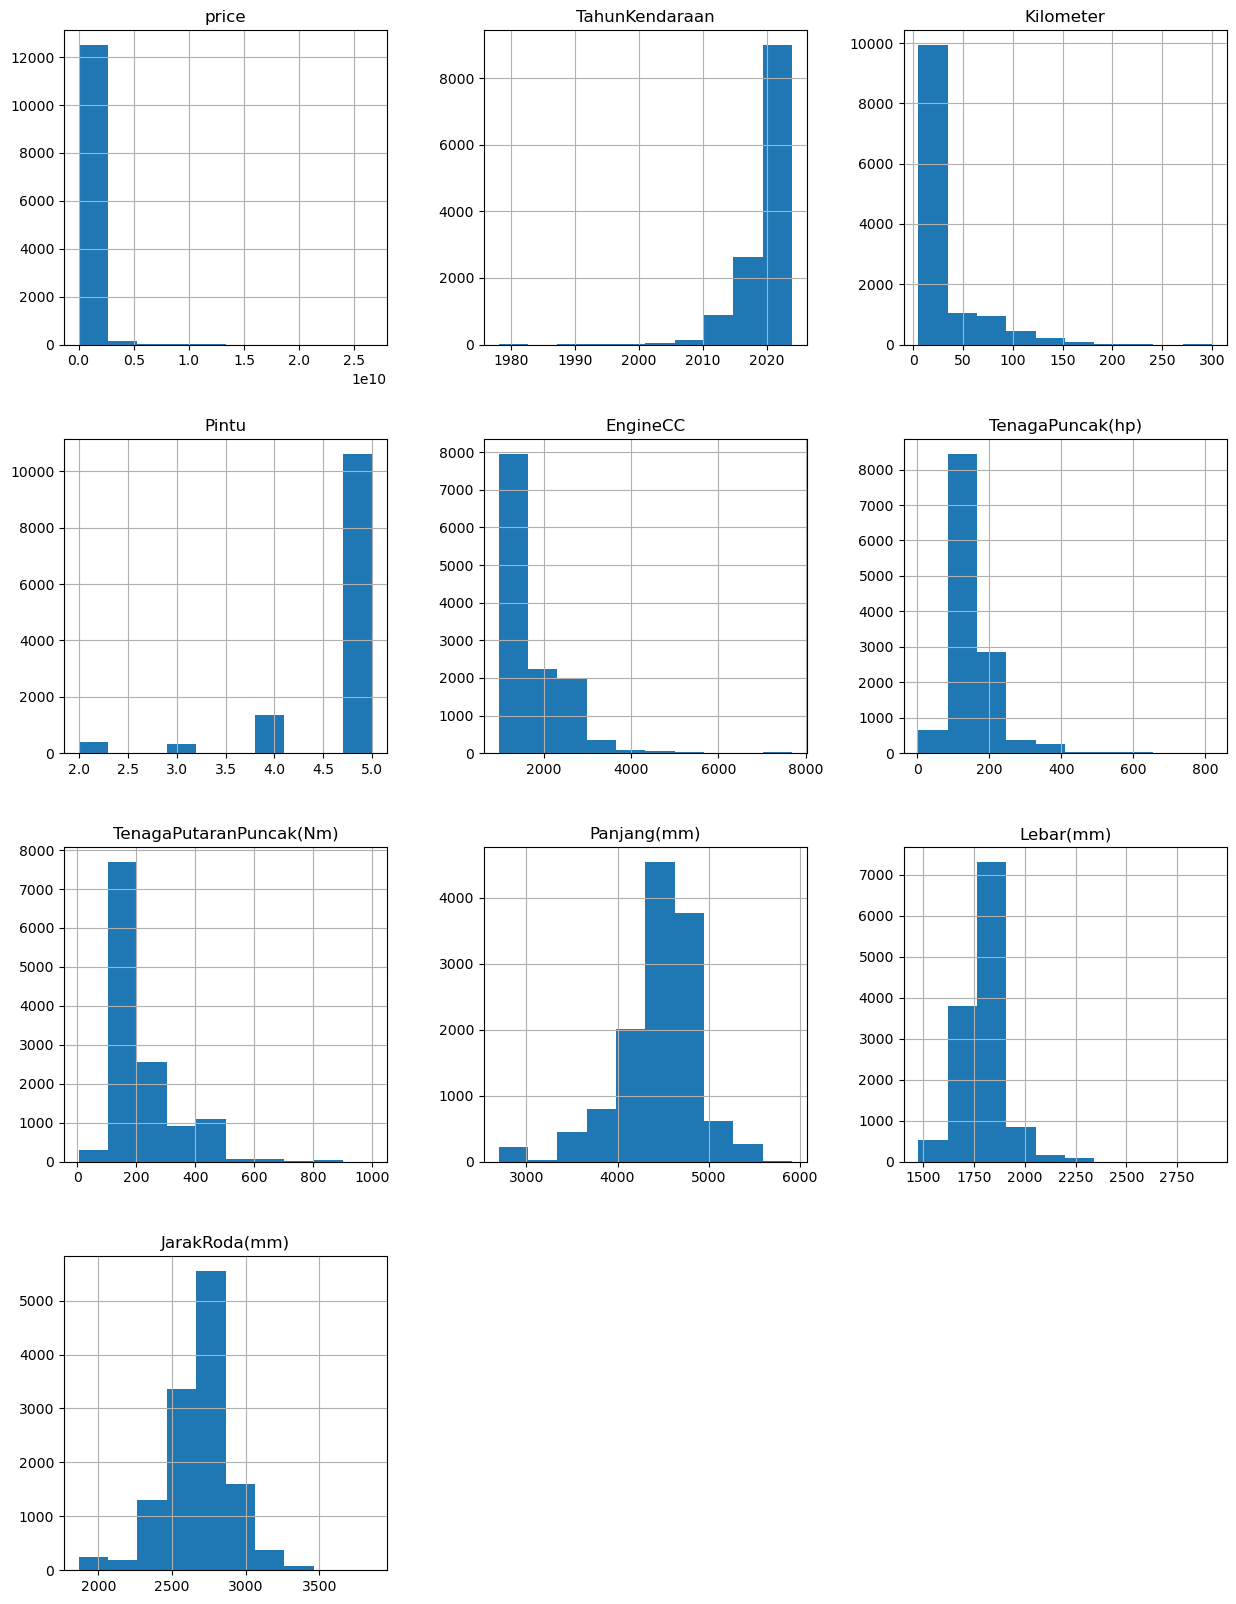

In [41]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

### Create data train dan test

In [42]:
X = df
y = df.drop(columns='price')

train, test = train_test_split(df, test_size=.2, random_state=37)

In [43]:
train.to_csv('../datasets/train.csv', index=False)

In [44]:
test.drop(columns='price', inplace=True)

test.to_csv('../datasets/test.csv', index=False)

In [45]:
df.isnull().sum()

brand                      0
price                      0
Kondisi                    0
TahunKendaraan             0
Kilometer                  0
Pintu                      0
Dirakit                    0
EngineCC                   0
TenagaPuncak(hp)           0
TenagaPutaranPuncak(Nm)    0
InjeksiLangsung            0
Aspirasi                   0
Panjang(mm)                0
Lebar(mm)                  0
JarakRoda(mm)              0
dtype: int64